In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from math import sqrt
from sklearn.metrics import mean_squared_error

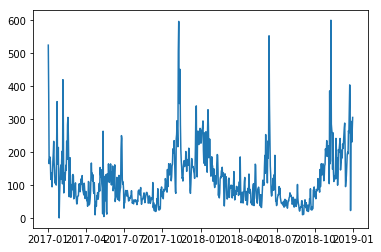

In [77]:
df = pd.read_excel("Delhi_perfect.xlsx")

def conv(x):
    return float(x)

df["PM2_5"]=df["PM2_5"].apply(conv)
df = pd.DataFrame(data =df , columns=['Date','PM2_5'])

df = df.set_index(['Date'])
plt.plot(df)

In [78]:
train = df[:500]
test = df[500:]
hat_avg = test.copy()


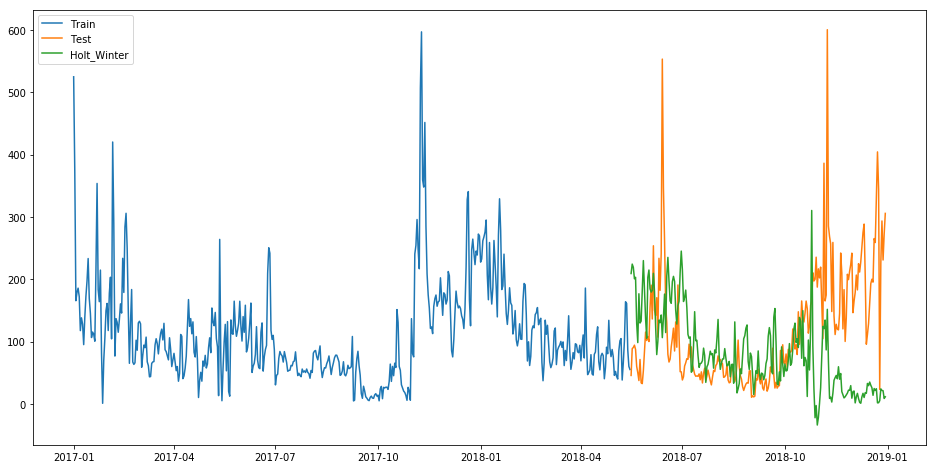

126.84190821498093


In [37]:
fit1 = ExponentialSmoothing(np.asarray(df['PM2_5']),seasonal_periods=363, trend='add', seasonal='add').fit()
hat_avg['Holt_winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['PM2_5'], label='Train')
plt.plot(test['PM2_5'], label='Test')
plt.plot(hat_avg['Holt_winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()
rms = sqrt(mean_squared_error(test["PM2_5"], hat_avg.Holt_winter))
print(rms)


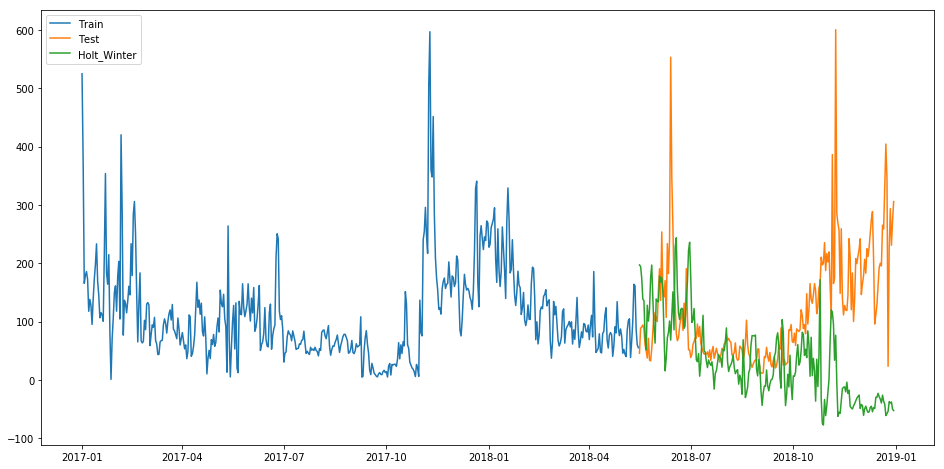

152.98328665030726


In [34]:
fit2 = ExponentialSmoothing(np.asarray(df['PM2_5']),seasonal_periods=363, trend='mul', seasonal='add').fit()
hat_avg['Holt_winter'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['PM2_5'], label='Train')
plt.plot(test['PM2_5'], label='Test')
plt.plot(hat_avg['Holt_winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()
rms = sqrt(mean_squared_error(test["PM2_5"], hat_avg.Holt_winter))
print(rms)

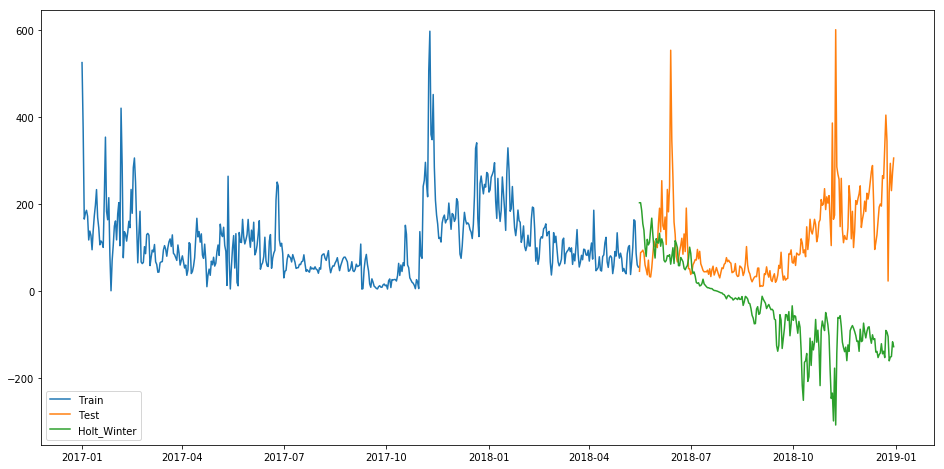

217.71067471576927


In [35]:
fit3 = ExponentialSmoothing(np.asarray(df['PM2_5']),seasonal_periods=363, trend='add', seasonal='mul').fit()
hat_avg['Holt_winter'] = fit3.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['PM2_5'], label='Train')
plt.plot(test['PM2_5'], label='Test')
plt.plot(hat_avg['Holt_winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()
rms = sqrt(mean_squared_error(test["PM2_5"], hat_avg.Holt_winter))
print(rms)

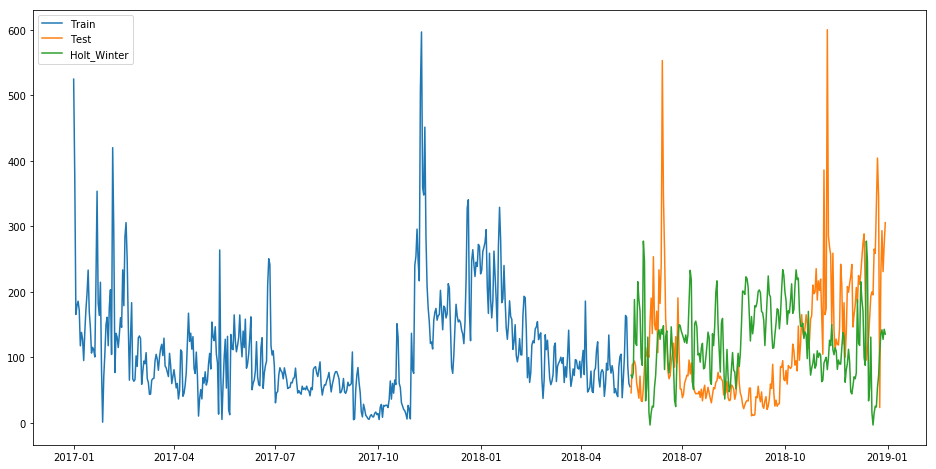

120.77059145942705


In [64]:
fit4 = ExponentialSmoothing(np.asarray(train['PM2_5']),seasonal_periods=200, trend='add', seasonal='add',damped=True).fit()
hat_avg['Holt_winter'] = fit4.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['PM2_5'], label='Train')
plt.plot(test['PM2_5'], label='Test')
plt.plot(hat_avg['Holt_winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()
rms = sqrt(mean_squared_error(test["PM2_5"], hat_avg.Holt_winter))
print(rms)

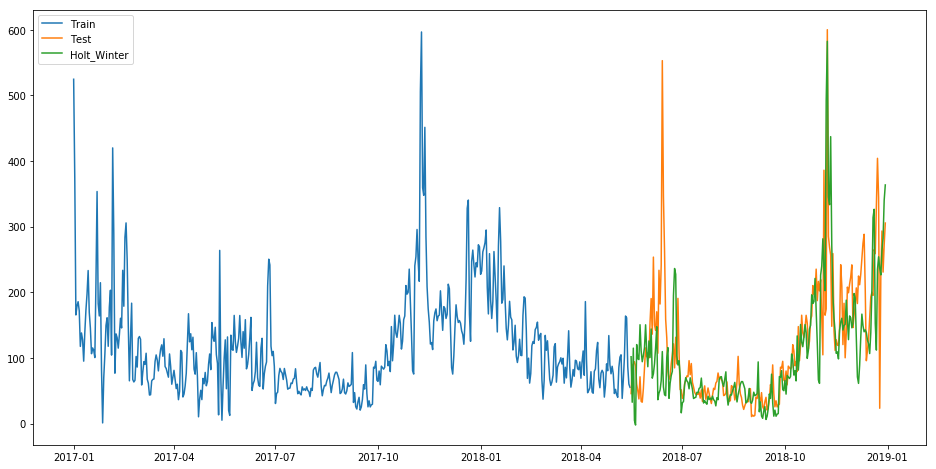

74.25686329757916


In [79]:
fit5 = ExponentialSmoothing(np.asarray(train['PM2_5']),seasonal_periods=364, trend=None, seasonal='add').fit()
hat_avg['Holt_winter'] = fit5.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['PM2_5'], label='Train')
plt.plot(test['PM2_5'], label='Test')
plt.plot(hat_avg['Holt_winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()
rms = sqrt(mean_squared_error(test["PM2_5"], hat_avg.Holt_winter))
print(rms)

In [ ]:
final_fit = ExponentialSmoothing(np.asarray(df["PM2_5"]),seasonal_periods=364,trend=None, sesonal)